# K-Means

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('kmeans.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


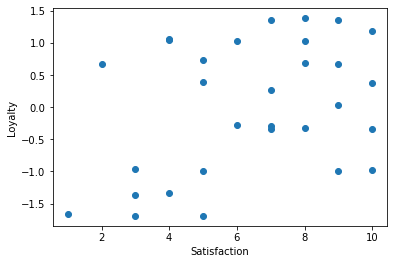

In [3]:
import matplotlib.pyplot as plt


plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [4]:
from sklearn import preprocessing

scaled_data = preprocessing.scale(data)
scaled_data

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [13]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,8):
    model = KMeans(n_clusters=i, init = 'k-means++')
    model.fit(scaled_data)
    wcss.append(model.inertia_)

[]

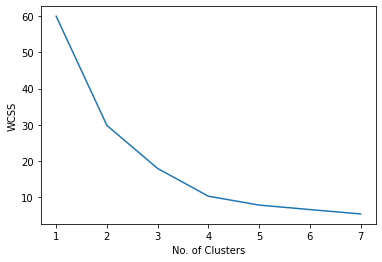

In [14]:
plt.plot(range(1,8),wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.plot()

In [15]:
# value of k = 4 (ELBOW METHOD)
model = KMeans(n_clusters=4)
model.fit(scaled_data)

KMeans(n_clusters=4)

In [16]:
pred = model.predict(scaled_data)
pred

array([0, 3, 0, 3, 2, 0, 3, 3, 1, 1, 3, 2, 0, 2, 3, 1, 1, 1, 3, 1, 1, 0,
       2, 0, 2, 3, 1, 3, 0, 2], dtype=int32)

In [17]:
cluster_data = data.copy()
cluster_data['cluster_prediction'] = pred

In [18]:
cluster_data.head()

,Satisfaction,Loyalty,cluster_prediction
0,4,-1.33,0
1,6,-0.28,3
2,5,-0.99,0
3,7,-0.29,3
4,4,1.06,2


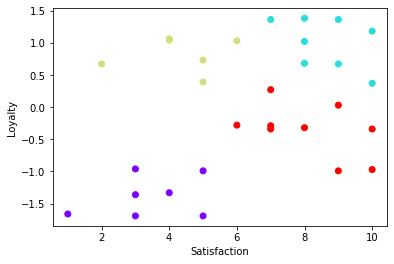

In [19]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c = cluster_data['cluster_prediction'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()